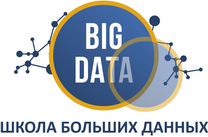

# Определения мошенника
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,auc, f1_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve

def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    print('Confusion Matrix: ')
    print(pd.DataFrame(confusion_matrix(y_true, y_pred)))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [2]:
df = pd.read_csv('data/creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


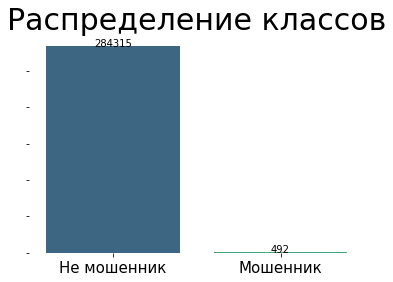

In [5]:
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Не мошенник', 'Мошенник'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Распределение классов', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

## Подготовим данные train/test

In [7]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

## Обучим дерево решений

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = clf.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9992135052386169

In [9]:
predictions = pd.DataFrame(dt_pred)
predictions[0].value_counts()

0    71078
1      124
Name: 0, dtype: int64

In [10]:
y_test.value_counts()

0    71070
1      132
Name: Class, dtype: int64

## Используем другие метрики

- Confusion Matrix

- Precision

- Recall

- F1

Accuracy:  0.9992135052386169
Recall:  0.7575757575757576
Precision:  0.8064516129032258
F1:  0.7812499999999999
Roc_AUC:  0.8786190311728513
Confusion Matrix: 
       0    1
0  71046   24
1     32  100


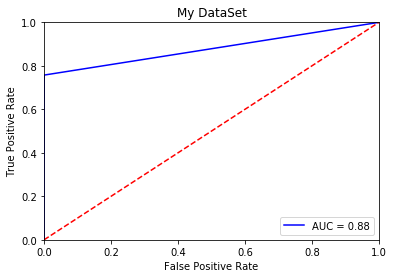

In [12]:
value_of_metrics(y_test, y_pred)

## Обучим случайный лес

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [15]:
accuracy_score(y_test, rfc_pred)

0.9995084407741356

In [16]:
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0    71097
1      105
Name: 0, dtype: int64

In [17]:
y_test.value_counts()

0    71070
1      132
Name: Class, dtype: int64

Accuracy:  0.9995084407741356
Recall:  0.7651515151515151
Precision:  0.9619047619047619
F1:  0.8523206751054851
Roc_AUC:  0.8825476163065864
Confusion Matrix: 
       0    1
0  71066    4
1     31  101


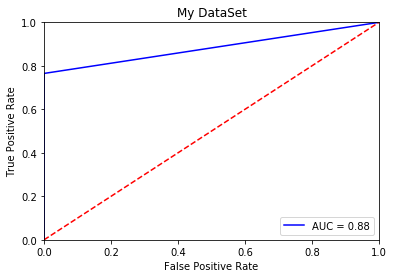

In [18]:
value_of_metrics(y_test, rfc_pred)